<a href="https://colab.research.google.com/github/Basit2612/Deep-Learning-with-Pytorch/blob/main/03_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

In [ ]:
import torchvision
from torchvision import datasets
from torchvision import models
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download the data to?
    train = True, # do we want the training dataset?
    download=True, # do we want to download yes/ no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10388897.89it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 218225.75it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1393905.42it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18068851.04it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
label

9

In [ ]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

# Visualize our Data

Text(0.5, 1.0, '9: Ankle boot')

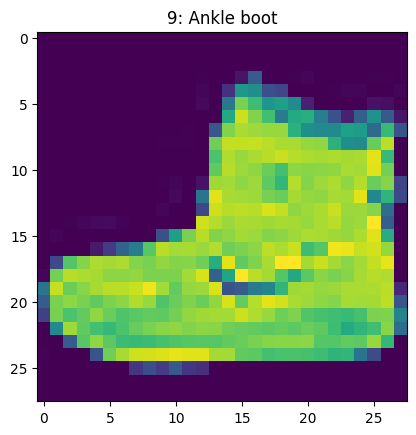

In [ ]:
plt.imshow(image.squeeze())
t = f"{label}: {class_names[label]}"
plt.title(t)

(-0.5, 27.5, 27.5, -0.5)

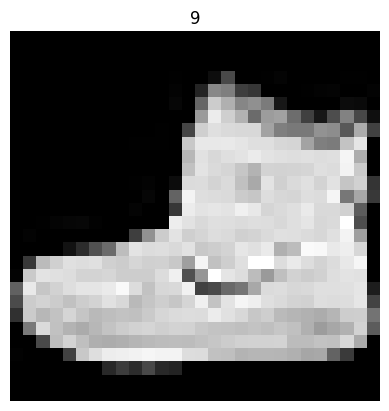

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)
plt.axis(False)

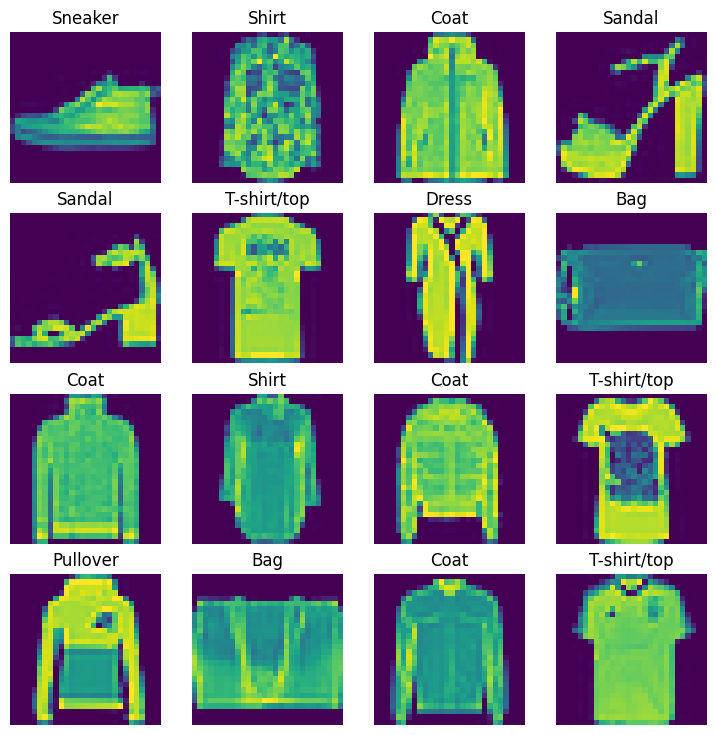

In [ ]:
# torch.manual_seed(42)
fig =plt.figure(figsize=(9 ,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label =  train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.title(class_names[label])
  plt.imshow(img.squeeze())
  plt.axis(False)

# Prepare Data

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d4a227d2b30>,
 <torch.utils.data.dataloader.DataLoader at 0x7d4a227d3880>)

In [ ]:
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batchers of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batchers of {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7d4a227d2b30>, <torch.utils.data.dataloader.DataLoader object at 0x7d4a227d3880>)
Length of train_dataloader: 1875 batchers of 32
Length of test_dataloader: 313 batchers of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch, len(train_features_batch), len(train_labels_batch) # Batch, Color, Height, Width

(torch.Size([32, 1, 28, 28]),
 tensor([6, 0, 8, 0, 5, 8, 7, 8, 9, 8, 3, 2, 3, 7, 5, 7, 8, 9, 7, 3, 5, 7, 0, 5,
         9, 8, 5, 9, 8, 2, 5, 9]),
 32,
 32)

Image_Size = torch.Size([1, 28, 28])
Label: 7, label_size torch.Size([])


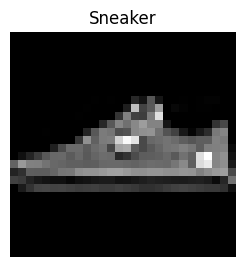

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.subplot(1, 2, 1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image_Size = {img.shape}")
print(f"Label: {label}, label_size {label.shape}")

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"X: {x.shape}\nOutput: {output.squeeze().shape}")

X: torch.Size([1, 28, 28])
Output: torch.Size([784])


In [ ]:
from torch import nn
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape: int,hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward (self, x):
    return self.layer_stack(x)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = FashionMNISTModel(input_shape=784,
                            hidden_units=10,
                            output_shape = len(class_names))
model_0.to(device)

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

In [ ]:
import requests
from pathlib import Path

if Path("helper_fuction.py").is_file():
  print("No need to dolwnload helper _functions")
else:
  data = requests.get(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(data.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  total_time = end-start
  print(f"Train Time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()

print_train_time(start = start_time, end = end_time, device="cpu")

Train Time on cpu: 0.000 seconds


5.8871000007343355e-05

In [ ]:
train_dataloader

In [ ]:
# Import tqdm for progress bar

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs= 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---")

  # Training
  train_loss=0
  # Add a loop
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X.to(device))

    loss = loss_fn(y_pred, y.to(device))
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch %400 ==0:
      print(f"Train Loss: {batch * len(X)}/{train_dataloader.dataset} samples.")

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test.to(device))

      test_loss += loss_fn(test_pred, y_test.to(device))

      test_acc = accuracy_fn(y_test.to(device), test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"Epoch: {epoch} | Train_Loss: {train_loss:.4f} | Test_loss: {test_loss:.4f} | Test_accuracy: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_time = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Train Loss: 0/Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples.
Train Loss: 12800/Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples.
Train Loss: 25600/Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples.
Train Loss: 38400/Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples.
Train Loss: 51200/Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() samples.
Epoch: 0 | Train_Loss: 0.5904 | Test_loss: 0.5095 | Test_accuracy: 0.2796
Epoch: 1
---
Train Loss: 0/Dataset FashionMNIST
    Number of datapoints: 60000
    Root loc

In [ ]:
str(next(model_0.parameters()).device)

'cpu'

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  with torch.inference_mode():
    for X, y in tqdm(dataloader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      train_loss = loss_fn(y_pred, y)
      loss += train_loss
      accuracy = accuracy_fn(y, y_pred.argmax(dim=1))
      acc += accuracy
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
class NonLinear(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer(x)

torch.manual_seed(42)
model_1 = NonLinear(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [ ]:
len(class_names)

10

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()
  for batch, (X, y) in enumerate(dataloader):

    y_pred = model(X.to(device))

    loss = loss_fn(y_pred, y.to(device))
    train_loss += loss
    train_acc += accuracy_fn(y.to(device), y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train Loss: {train_loss:.4f} | Train_accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.dataloader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              optimizer: torch.optim.Optimizer,
              device: torch.device = device):

  test_loss, test_acc = 0.0, 0.0

  model.eval()

  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1)) # go from ,oigits to -> predction_labels

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test Loss: {test_loss:.4f} | Test Accuracy {test_acc:.2f}%")

In [ ]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

from timeit import default_timer as timer

time_start_on_gpu = timer()
from tqdm.auto import tqdm
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")

  train_step(model = model_1,
             dataloader = train_dataloader,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             loss_fn=loss_fn,
             device=str(next(model_1.parameters()).device))
  test_step(model = model_1,
            dataloader= test_dataloader,
            accuracy_fn =accuracy_fn,
            optimizer = optimizer,
            loss_fn = loss_fn,
            device = str(next(model_1.parameters()).device))

  train_time_end_on_gpu = timer()

  total_train_time =print_train_time(start=time_start_on_gpu,
                                     end = train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 1.0920 | Train_accuracy: 61.34%
Test Loss: 0.9564 | Test Accuracy 65.00%
Train Time on cpu: 11.583 seconds
Epoch: 1
----
Train Loss: 0.7810 | Train_accuracy: 71.93%
Test Loss: 0.7223 | Test Accuracy 73.91%
Train Time on cpu: 23.424 seconds
Epoch: 2
----
Train Loss: 0.6703 | Train_accuracy: 75.94%
Test Loss: 0.6850 | Test Accuracy 75.02%
Train Time on cpu: 35.592 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time

35.59238134999998

In [ ]:
model_1_results = eval_model(model=model_1,
                             dataloader = test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'NonLinear',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
import pandas as pd
model_0 = pd.DataFrame([model_0_results])
model_1 = pd.DataFrame([model_1_results])
Results = pd.concat([model_0, model_1], ignore_index=True)
Results.index = ["FashionMNISTModel","NonLinear"]
Results.drop("model_name", axis=1, inplace=True)
print(Results)

                   model_loss  model_acc
FashionMNISTModel    0.476639  83.426518
NonLinear            0.685001  75.019968


In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  padding=1,
                  stride=1,
                  kernel_size=3
                  ),
        nn.ReLU()
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU()
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*6*6,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"{x.shape}")
    x = self.conv_block_2(x)
    # print(f"{x.shape}")
    x = self.conv_block_3(x)
    # print(f"{x.shape}")
    x = self.conv_block_4(x)
    # print(f"{x.shape}")
    x = self.classifier(x)
    # print(f"{self.classifier}")
    return x

model_2 = FashionMNISTModelV2(input_shape=1, # For color images input_shape=3
                              hidden_units=10, # As CNN Explainer Shows
                              output_shape=len(class_names)).to(device)

In [ ]:
torch.manual_seed(42)

images = torch.randn(32, 3, 64, 64)
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single Image Shape: {test_image.shape}")
print(f"Test Image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single Image Shape: torch.Size([3, 64, 64])
Test Image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.1354,  0.2211, -0.2631],
                        [-0.1537, -0.0941, -0.2004],
                        [ 0.0315, -0.3292,  0.3010]]],
              
              
                      [[[-0.2832,  0.2573,  0.0555],
                        [-0.1082,  0.2060,  0.0520],
                        [ 0.2693,  0.0364, -0.1051]]],
              
              
                      [[[ 0.0896, -0.0904,  0.1403],
                        [ 0.2976,  0.1927, -0.1457],
                        [ 0.1924,  0.0596,  0.1693]]],
              
              
                      [[[-0.2032, -0.3300, -0.1288],
                        [-0.2557,  0.2735,  0.0960],
                        [ 0.1381,  0.1054, -0.0058]]],
              
              
                      [[[ 0.2609, -0.2368,  0.0210],
                        [-0.2275,  0.1028, -0.1148],
                        [ 0.1021, -0.0694,  0.2765]]],
              
              
      

In [ ]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
image.shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

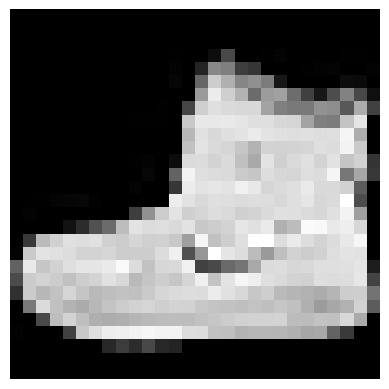

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)

# nn.Conv2d Explaination

In [ ]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, out_channels=64,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([64, 62, 62])

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
torch.__version__

'2.3.0+cu121'

# nn.MaxPool2d

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
print(f"Test image original shape{test_image.shape}")
print(f"Test Image with unsqueezed dimension {test_image.unsqueeze(0).shape}")

MaxPool2d = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))

print(f"Shape after through conv_layer: {test_image_through_conv.shape}")
print(f"Shape after through conv & MaxPool layer: {MaxPool2d(test_image_through_conv).shape}")

Test image original shapetorch.Size([3, 64, 64])
Test Image with unsqueezed dimension torch.Size([1, 3, 64, 64])
Shape after through conv_layer: torch.Size([1, 64, 62, 62])
Shape after through conv & MaxPool layer: torch.Size([1, 64, 31, 31])


In [ ]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,1,2,2))
print(f"MaxPooltensor:{random_tensor}")
print(f"MaxPooltensor Shape:{random_tensor.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"MaxPooltensor:{max_pool_tensor}")
print(f"MaxPooltensor Shape:{max_pool_tensor.shape}")

MaxPooltensor:tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
MaxPooltensor Shape:torch.Size([1, 1, 2, 2])
MaxPooltensor:tensor([[[[0.3367]]]])
MaxPooltensor Shape:torch.Size([1, 1, 1, 1])


In [ ]:
rand_image_tensor = torch.randn(size=(1, 28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0480, -0.0795,  0.0352, -0.0017, -0.0143, -0.0069,  0.1214,  0.0517,
          0.0243, -0.0878]], grad_fn=<AddmmBackward0>)

In [ ]:
# Setup a Loss function and optimizer
import torch
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr=0.1)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.1354,  0.2211, -0.2631],
                        [-0.1537, -0.0941, -0.2004],
                        [ 0.0315, -0.3292,  0.3010]]],
              
              
                      [[[-0.2832,  0.2573,  0.0555],
                        [-0.1082,  0.2060,  0.0520],
                        [ 0.2693,  0.0364, -0.1051]]],
              
              
                      [[[ 0.0896, -0.0904,  0.1403],
                        [ 0.2976,  0.1927, -0.1457],
                        [ 0.1924,  0.0596,  0.1693]]],
              
              
                      [[[-0.2032, -0.3300, -0.1288],
                        [-0.2557,  0.2735,  0.0960],
                        [ 0.1381,  0.1054, -0.0058]]],
              
              
                      [[[ 0.2609, -0.2368,  0.0210],
                        [-0.2275,  0.1028, -0.1148],
                        [ 0.1021, -0.0694,  0.2765]]],
              
              
      

# Training and Test Model using train, test functions

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  padding=1,
                  stride=1,
                  kernel_size=3
                  ),
        nn.ReLU()
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU()
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*6*6,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"{x.shape}")
    x = self.conv_block_2(x)
    # print(f"{x.shape}")
    x = self.conv_block_3(x)
    # print(f"{x.shape}")
    x = self.conv_block_4(x)
    # print(f"{x.shape}")
    x = self.classifier(x)
    # print(f"{self.classifier}")
    return x

model_2 = FashionMNISTModelV2(input_shape=1, # For color images input_shape=3
                              hidden_units=10, # As CNN Explainer Shows
                              output_shape=len(class_names)).to(device)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

from tqdm.auto import tqdm

epochs = 3

for epoch in tqdm(range(epoch)):
  print(f"Epoch: {epoch}/n---")

  train_step(model= model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn = accuracy_fn,
            optimizer=optimizer,
            device=device)

train_time_end_model_2 = timer()
total_train_time = print_train_time(start=train_time_start_model_2,
                                    end=train_time_end_model_2,
                                    device=device)


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 0/n---
Train Loss: 2.3030 | Train_accuracy: 10.31%
Test Loss: 2.3030 | Test Accuracy 10.29%
Epoch: 1/n---
Train Loss: 2.3030 | Train_accuracy: 10.31%
Test Loss: 2.3030 | Test Accuracy 10.29%
Train Time on cpu: 115.444 seconds


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root= "data",
    train=False,
    download = True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [ ]:
import requests

request = requests.get(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py","wb") as f:
  f.write(request.content)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  padding=1,
                  stride=1,
                  kernel_size=3
                  ),
        nn.ReLU()
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU()
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*6*6,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"{x.shape}")
    x = self.conv_block_2(x)
    # print(f"{x.shape}")
    x = self.conv_block_3(x)
    # print(f"{x.shape}")
    x = self.conv_block_4(x)
    # print(f"{x.shape}")
    x = self.classifier(x)
    # print(f"{self.classifier}")
    return x

model_2 = FashionMNISTModelV2(input_shape=1, # For color images input_shape=3
                              hidden_units=10, # As CNN Explainer Shows
                              output_shape=len(class_names)).to(device)

In [ ]:
len(class_names)

10

In [ ]:
torch.manual_seed(42)
random_tensor_image = torch.randn(size=(1, 28, 28)).to(device)
random_tensor_image.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(random_tensor_image.unsqueeze(0))

tensor([[-0.0484, -0.0729, -0.0161,  0.0176,  0.0546, -0.0010,  0.0376, -0.0147,
         -0.1666, -0.0575]], grad_fn=<AddmmBackward0>)

In [ ]:
# Training Step function
from helper_functions import accuracy_fn

torch.manual_seed(42)
torch.cuda.manual_seed(42)

class Model(nn.Module):
  def __init__(self, model):
    super().__init__()
    self.model=model
    self.loss_fn = nn.CrossEntropyLoss()
    self.optimizer = torch.optim.SGD(params = self.model.parameters(), lr =0.1)

  def train_step(self, model: torch.nn.Module,
                dataloader,
                device: torch.device = device,
                accuracy= accuracy_fn):
    model.train()
    train_loss, train_acc = 0,0
    model.to(device)

    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss = self.loss_fn(y_pred, y)
      train_loss += loss
      train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

      self.optimizer.zero_grad()

      loss.backward()

      self.optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")

  def test_step(self, model: torch.nn.Module,
                dataloader,
                device: torch.device = device,
                accuracy= accuracy_fn):

    model.eval()
    model.to(device)
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
      for (X, y) in dataloader:
        X, y = X.to(device), y.to(device)

        test_pred = model(X)

        t_loss = self.loss_fn(test_pred, y)
        test_loss += t_loss
        test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

      test_loss /= len(dataloader)
      test_acc /= len(dataloader)

      print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

model_x = Model(model_2)
model_x.test_step(model=model_2, dataloader=test_dataloader)

Test Loss: 2.3038859367370605, Test Accuracy: 9.994009584664537


In [ ]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

from timeit import default_timer as timer
from tqdm.auto import tqdm

start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  model_x.train_step(model=model_2, dataloader=train_dataloader)

  model_x.test_step(model=model_2, dataloader=test_dataloader)

end_time=timer()

total_train_time_2 = print_train_time(start=start_time,
                                      end=end_time,
                                      device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train Loss: 0.7142807841300964, Train Accuracy: 73.445
Test Loss: 0.43910959362983704, Test Accuracy: 84.1952875399361
Epoch: 1
------
Train Loss: 0.3948075473308563, Train Accuracy: 85.525
Test Loss: 0.3713724911212921, Test Accuracy: 86.5814696485623
Epoch: 2
------
Train Loss: 0.34510162472724915, Train Accuracy: 87.485
Test Loss: 0.34751424193382263, Test Accuracy: 87.46006389776358
Train Time on cpu: 159.744 seconds


In [ ]:
model_2_results= eval_model(model=model_2,
                            dataloader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn = accuracy_fn
                           )

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34751424193382263,
 'model_acc': 87.46006389776358}

In [ ]:
import pandas as pd
compare_results = pd. DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.476639,83.426518
1,NonLinear,0.685001,75.019968
2,FashionMNISTModelV2,0.347514,87.460064


In [ ]:
compare_results["training_time"] = [total_time,
                                    total_train_time,
                                    total_train_time_2
                                    ]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel,0.476639,83.426518,37.674962
1,NonLinear,0.685001,75.019968,115.444108
2,FashionMNISTModelV2,0.347514,87.460064,159.743841


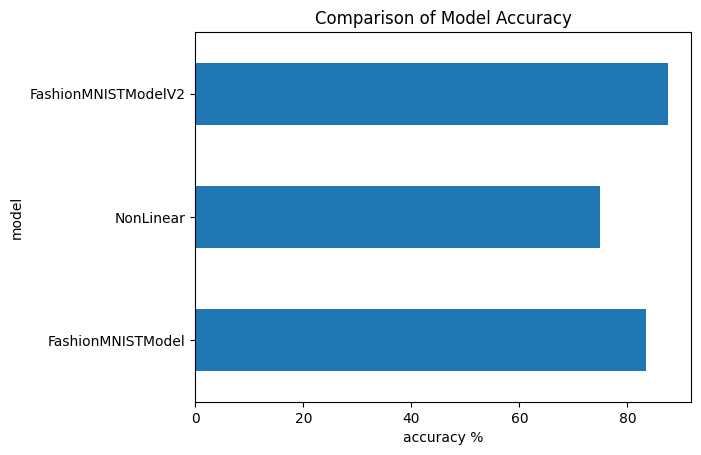

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model")
plt.title("Comparison of Model Accuracy")
plt.show()

# Make Predictions

In [ ]:
import random
# random.seed(42)
test_samples= []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device
                     ):
  pred_probs =[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu()) # Matplotlib doesn't work with gpu

  return torch.stack(pred_probs)

x = make_predictions(model=model_2,
                     data=test_samples)

In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Pullover')

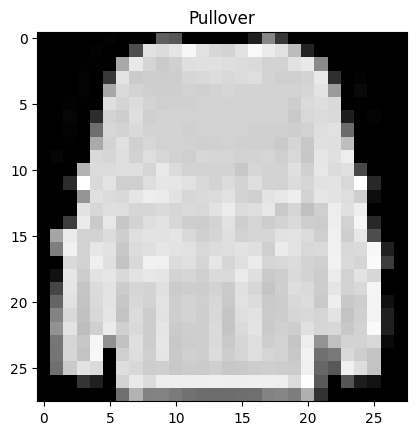

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[4.5414e-02, 1.0107e-03, 8.0753e-01, 3.1165e-02, 2.0158e-02, 8.6740e-06,
         8.8489e-02, 5.5434e-05, 6.1049e-03, 6.0238e-05],
        [9.5359e-01, 7.0032e-05, 1.6371e-03, 2.6864e-02, 2.8729e-05, 8.9474e-06,
         1.7719e-02, 1.1427e-05, 6.6747e-05, 2.0574e-06]])

In [ ]:
test_labels

[2, 0, 0, 0, 3, 7, 9, 8, 1]

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 0, 0, 0, 3, 7, 9, 8, 1])

In [ ]:
test_labels == pred_classes

False

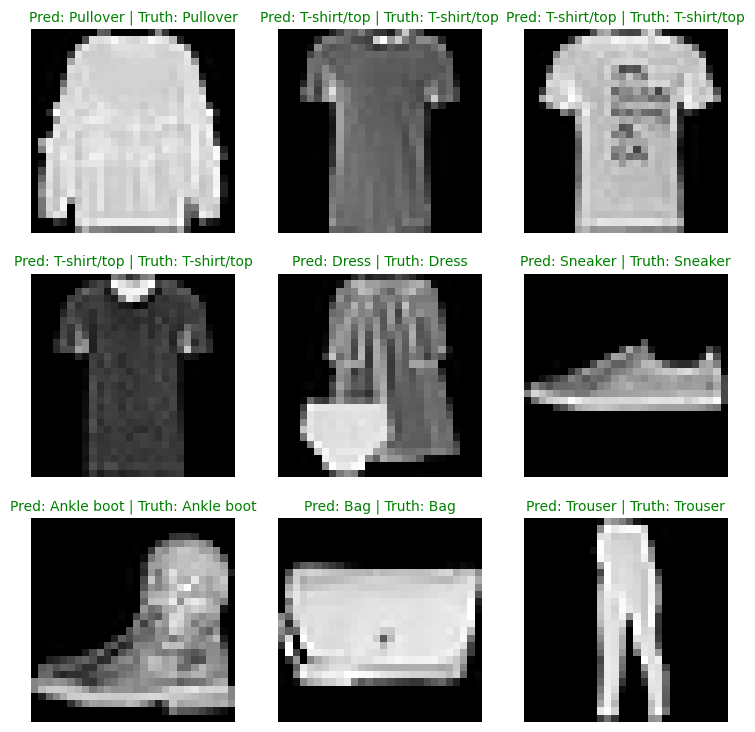

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 3
ncol = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncol, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize= 10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

# Confusion Matrix

In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.22.0'

In [ ]:
from tqdm.auto import tqdm

# Predictions
y_preds = []
model_2.eval()
model_2.to(device)

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.2 MB/s eta 0:00:00
mlxtend version: 0.22.0


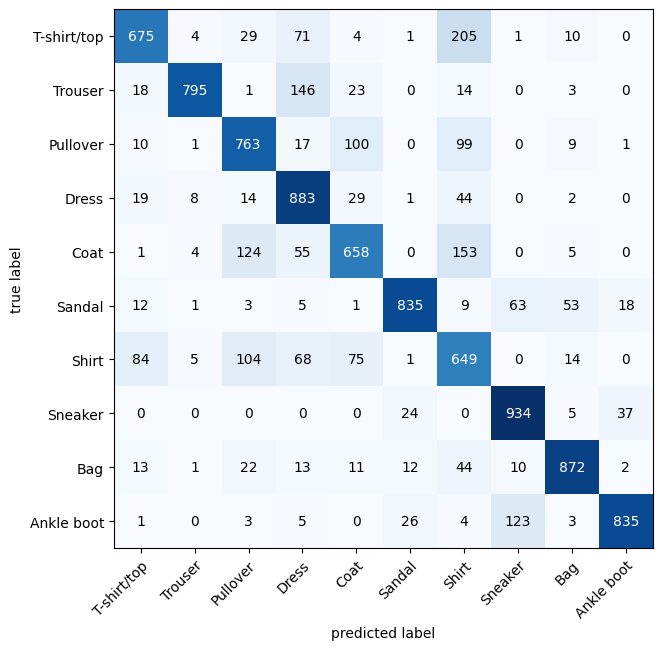

In [ ]:
import numpy
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup Confusion Instance
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)

# Plot the Confusion Matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10, 7)
)

In [ ]:
y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 0])

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
confmat_tensor

tensor([[675,   4,  29,  71,   4,   1, 205,   1,  10,   0],
        [ 18, 795,   1, 146,  23,   0,  14,   0,   3,   0],
        [ 10,   1, 763,  17, 100,   0,  99,   0,   9,   1],
        [ 19,   8,  14, 883,  29,   1,  44,   0,   2,   0],
        [  1,   4, 124,  55, 658,   0, 153,   0,   5,   0],
        [ 12,   1,   3,   5,   1, 835,   9,  63,  53,  18],
        [ 84,   5, 104,  68,  75,   1, 649,   0,  14,   0],
        [  0,   0,   0,   0,   0,  24,   0, 934,   5,  37],
        [ 13,   1,  22,  13,  11,  12,  44,  10, 872,   2],
        [  1,   0,   3,   5,   0,  26,   4, 123,   3, 835]])

# Load and Save the Model

In [ ]:
from pathlib import Path

Model_Path = Path("models")
Model_Path.mkdir(parents=True, exist_ok=True)

Model_Name = "03_Computer_Vision.pth"
Model_Save_Path = Model_Path / Model_Name
torch.save(obj=model_2.state_dict(),
           f=Model_Save_Path)

In [ ]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names)
                                     )

loaded_model_2.load_state_dict(torch.load(f=Model_Save_Path))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_block_4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=360, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34751424193382263,
 'model_acc': 87.46006389776358}

In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34751424193382263,
 'model_acc': 87.46006389776358}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-03)

tensor(True)